In [1]:
import scipy.spatial.distance as distance

distance.euclidean([0,0],[3,4])
distance.cityblock([0,0],[1,2])

3

In [2]:
import pandas as pd
from sklearn.datasets import make_moons

X ,Y = make_moons(n_samples=200, noise=0.2, random_state=123)

df_moon = pd.concat([pd.DataFrame(X, columns = ["x", "y"]), pd.Series(Y)], axis=1)
df_moon

,x,y,0
0,-0.077962,1.062934,0
1,0.202304,-0.067724,1
2,0.599808,0.672377,0
3,1.048411,-0.651377,1
4,0.891249,0.700564,0
...,...,...,...
195,0.582361,0.349507,0
196,-1.089187,-0.070904,0
197,-0.259150,1.007580,0
198,0.234220,-0.154151,1


<AxesSubplot:xlabel='x', ylabel='y'>

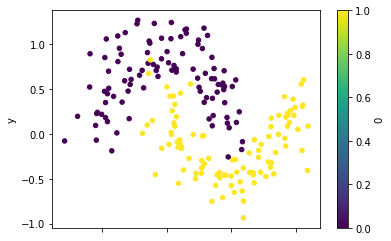

In [3]:
df_moon.plot.scatter(x = "x", y = "y", c = 0, colormap = "viridis")

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=123)

In [5]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X = X_train, y = Y_train)

y_pred = model.predict(X_test)
accuracy_score(y_true=Y_test, y_pred=y_pred)


1.0

In [6]:
dia = pd.read_csv("../data/diamonds.csv")
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
dia_train, dia_test = train_test_split(dia, train_size = 0.7, random_state = 123)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

import pandas as pd

df = pd.read_excel("../data/iris_xlsx.xlsx")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
X = df.loc[:, :"Petal.Width"]
kmeans = KMeans(n_clusters=3).fit(X)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [61]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

df = pd.read_csv("../data/bike.csv")


## Way 1
y, x = dmatrices(f"{df.columns[0]} ~ {' + '.join(df.columns[1:])}", df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
print("VIF (Varriance Inflation Factor)")
print(vif)
print()



## Way 2
df_intercept = pd.DataFrame(np.ones_like(df.iloc[:,0]), columns=["Intercept"]).astype("float")
df_concat = pd.concat([df_intercept, df.iloc[:, 1:]], axis = 1)

vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(df_concat.values, i) for i in range(df_concat.shape[1])]
vif2["features"] = df_concat.columns
print("VIF (Varriance Inflation Factor)")
print(vif2)
print()


## Way 2-2
df_sub = df.iloc[:, 1:]

vif2_2 = pd.DataFrame()
vif2_2["VIF Factor"] = [variance_inflation_factor(df_sub.values, i) for i in range(df_sub.shape[1])]
vif2_2["features"] = df_sub.columns
print("VIF (Varriance Inflation Factor)")
print(vif2_2)
print()


## Way 3
my_vif = []
for i in range(1, df.shape[1]):
    lm = smf.ols(f"{df.columns[i]} ~ {' + '.join(df.columns[1:i].append(df.columns[i+1:]))}", df).fit()
    lm.summary()
    vif_for_i_th_X = round(1 / (1 - lm.rsquared), 6)
    my_vif.append(vif_for_i_th_X)

vif3 = pd.DataFrame(my_vif, columns=['VIF Factor'])
vif3["features"] = df.columns[1:]
print("VIF (Varriance Inflation Factor) by my code")
print(vif3)
print()

/home/rolroralra/venv/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/rolroralra/venv/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/rolroralra/venv/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF (Varriance Inflation Factor)
    VIF Factor    features
0    35.610016   Intercept
1     1.166687      season
2     1.074011     holiday
3     1.421635  workingday
4     1.239547     weather
5    35.603425        temp
6    35.672914       atemp
7     1.655918    humidity
8     1.197639   windspeed
9          inf      casual
10         inf  registered
11         inf       count

VIF (Varriance Inflation Factor)
    VIF Factor    features
0    35.610016   Intercept
1     1.166687      season
2     1.074011     holiday
3     1.421635  workingday
4     1.239547     weather
5    35.603425        temp
6    35.672914       atemp
7     1.655918    humidity
8     1.197639   windspeed
9          inf      casual
10         inf  registered
11         inf       count

VIF (Varriance Inflation Factor)
    VIF Factor    features
0     6.820092      season
1     1.094765     holiday
2     4.072190  workingday
3     7.355967     weather
4   263.959086        temp
5   292.306415       atemp
6    12.

/home/rolroralra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/home/rolroralra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/home/rolroralra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
import scipy.stats as stats
stats.normaltest

In [ ]:
from statsmodels.stats import anova



NameError: name 'inf' is not defined